In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [43]:
adm = pd.read_csv('adm_data.csv')
adm.columns = adm.columns.str.strip()
adm.head()
print("Information:")
print(adm.info())
print('\n')
print("Summary Statistics:")
print(adm.describe())


Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
None


Summary Statistics:
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514    

In [44]:
#Check missing values
print("Number of mising values:")
print(adm.isnull().sum())

Number of mising values:
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


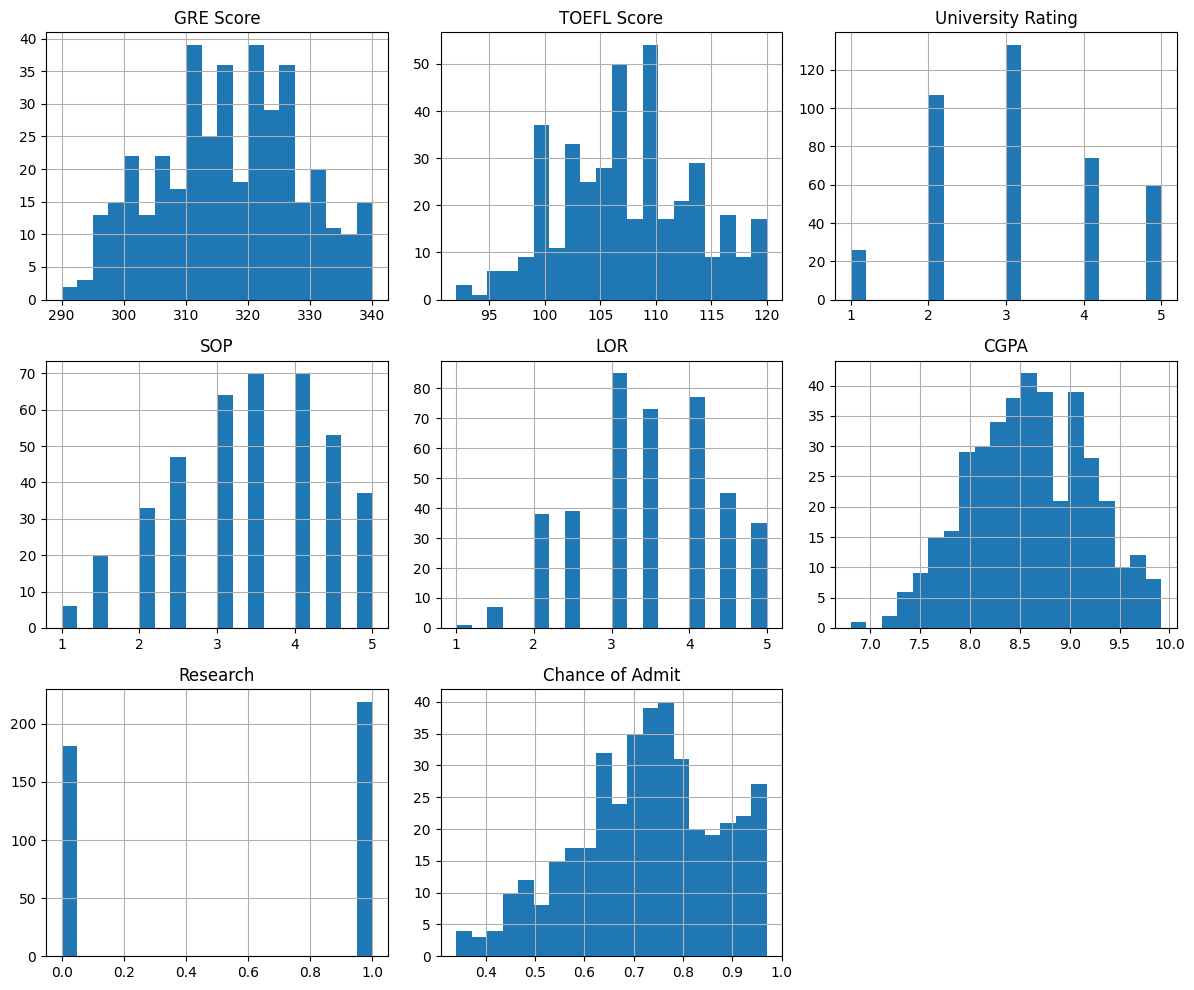

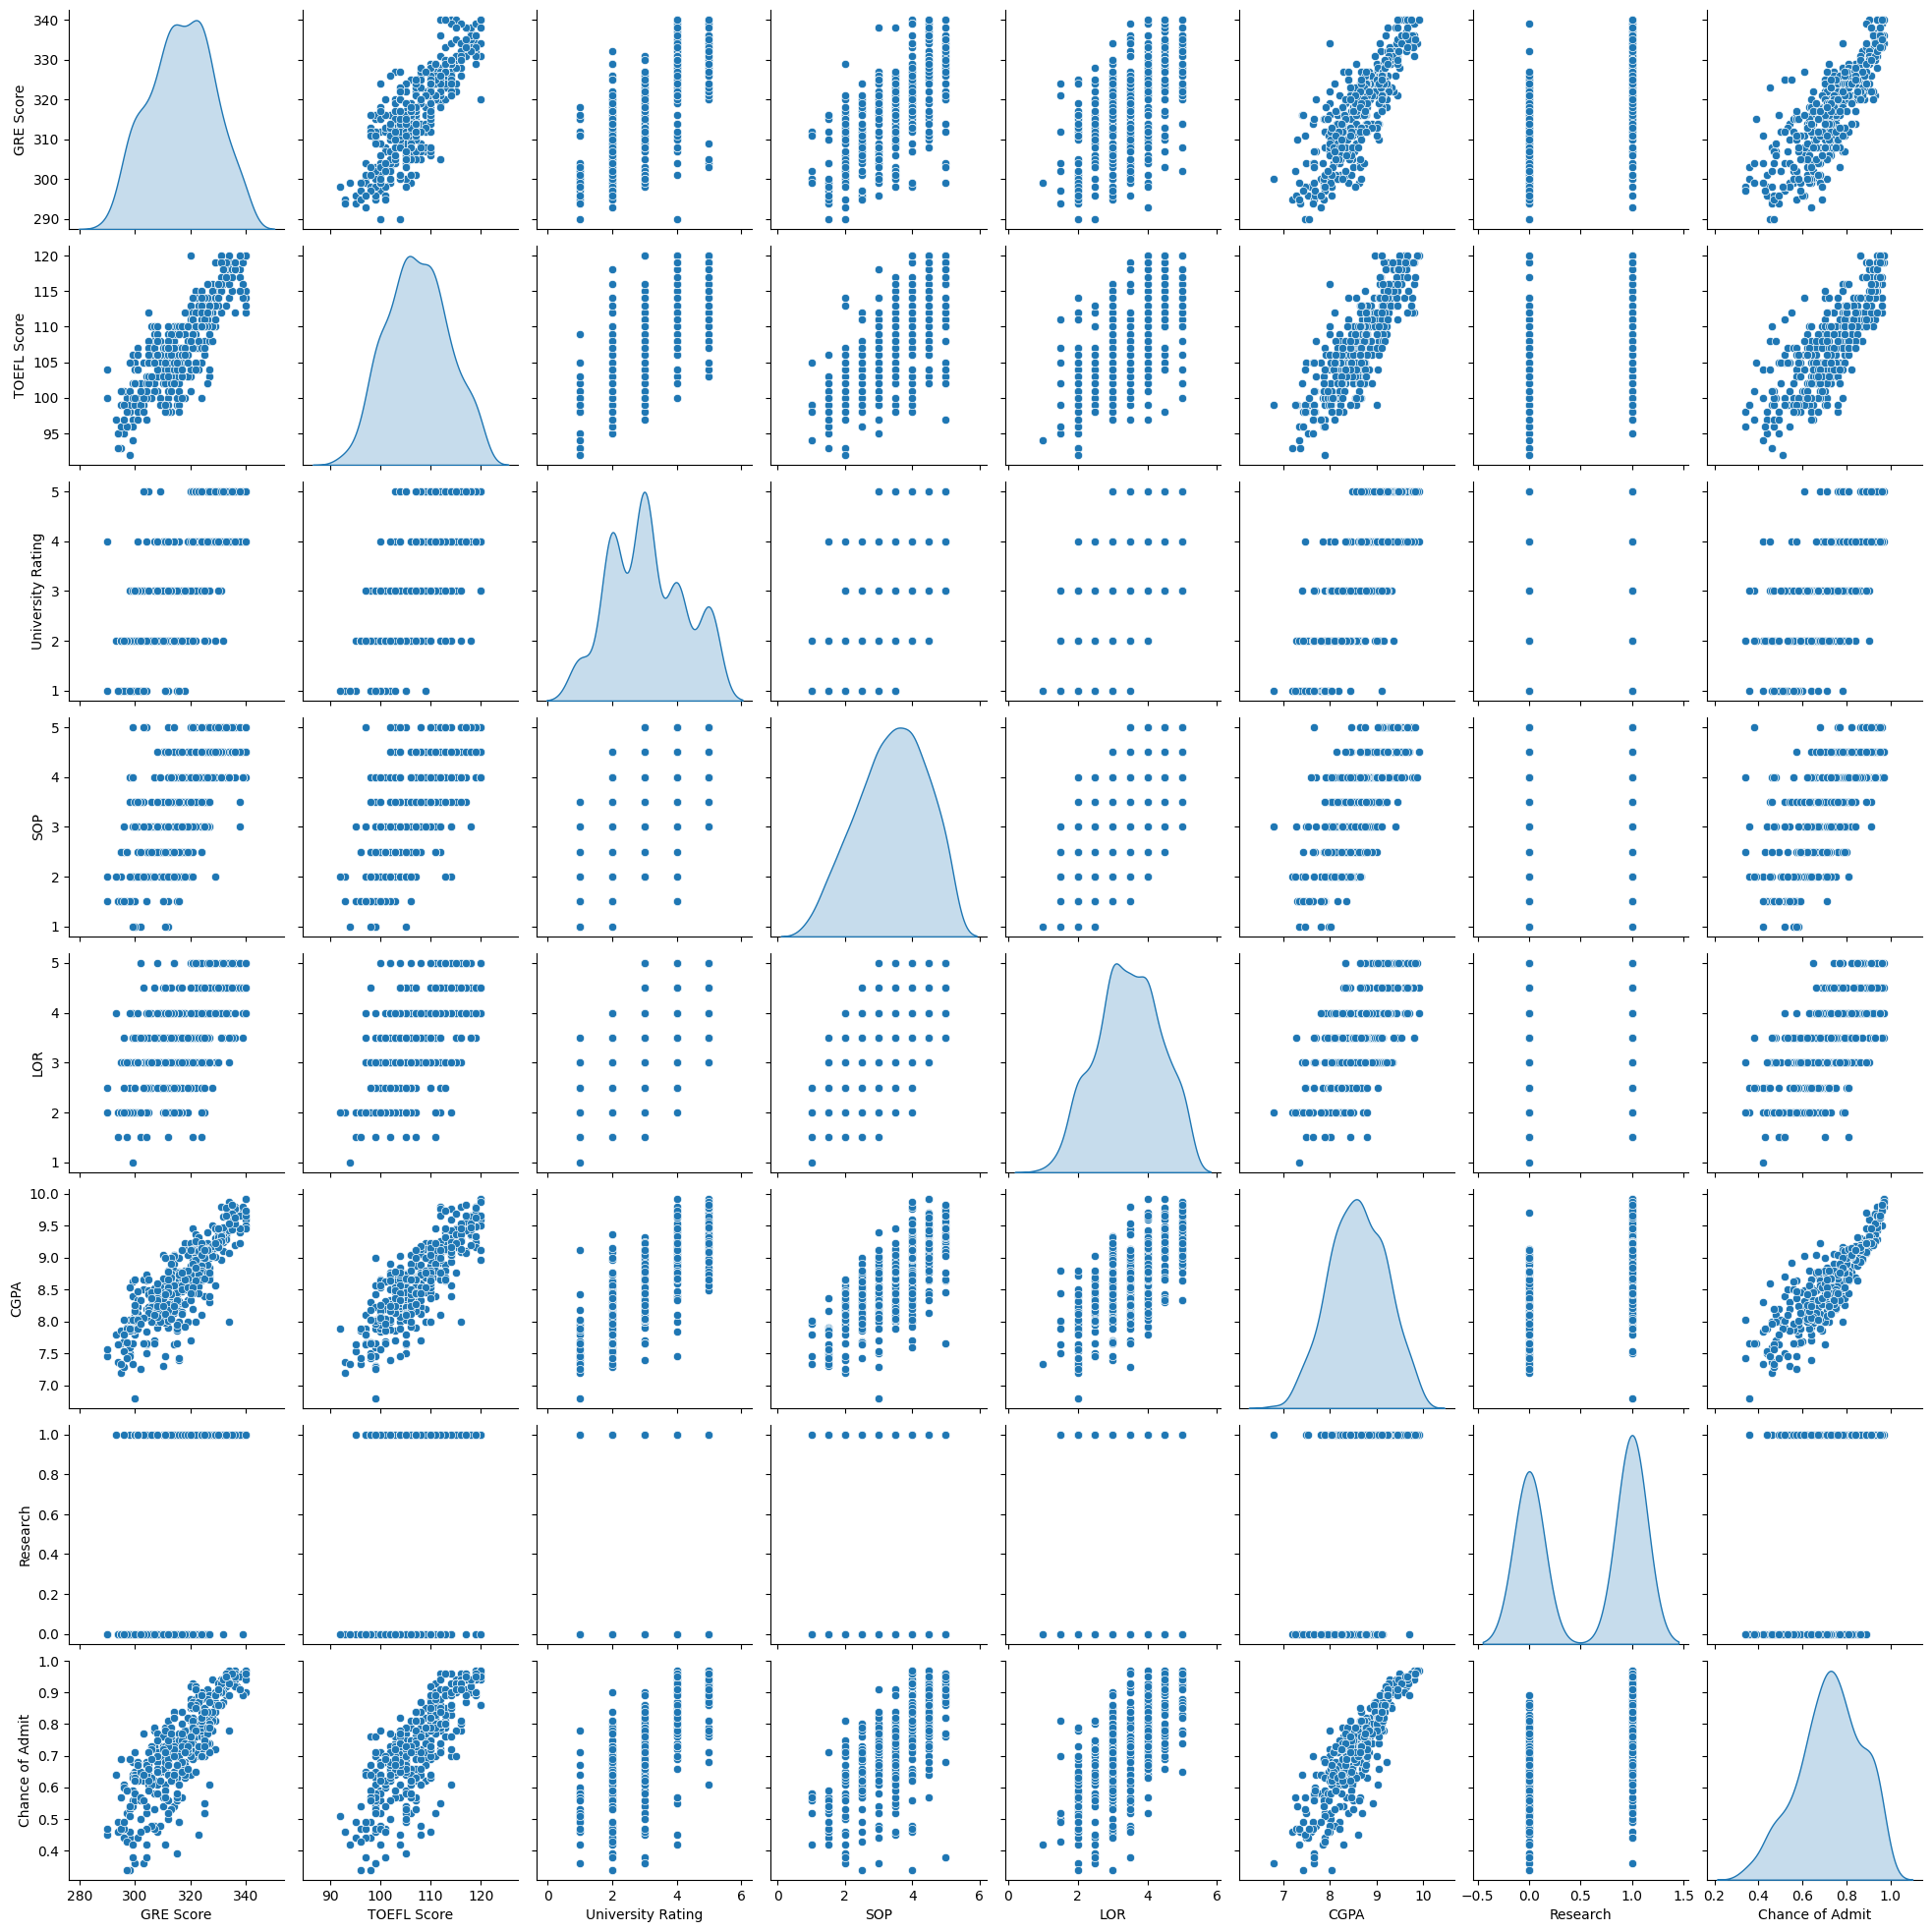

In [45]:
#Histograms for numeric features
num_features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']
adm[num_features].hist(bins=20, figsize=(12,10))
plt.tight_layout()
plt.show()

#Scatter plots
sns.pairplot(adm[num_features], diag_kind='kde')
plt.show()

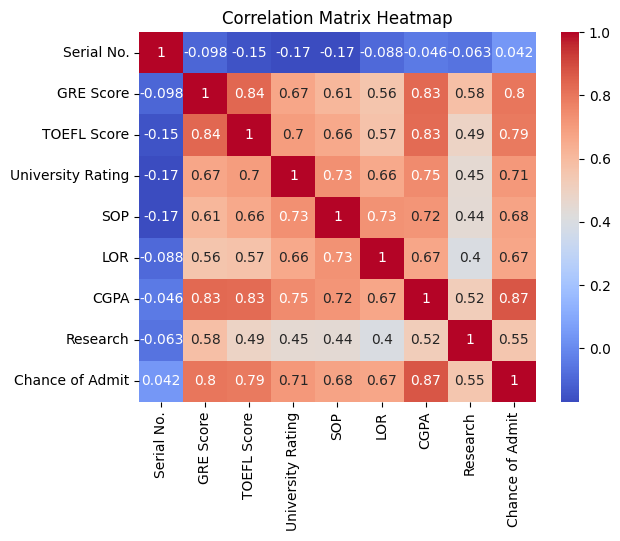

In [46]:
#Correlation matrix
corr_matrix = adm.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()
#GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA

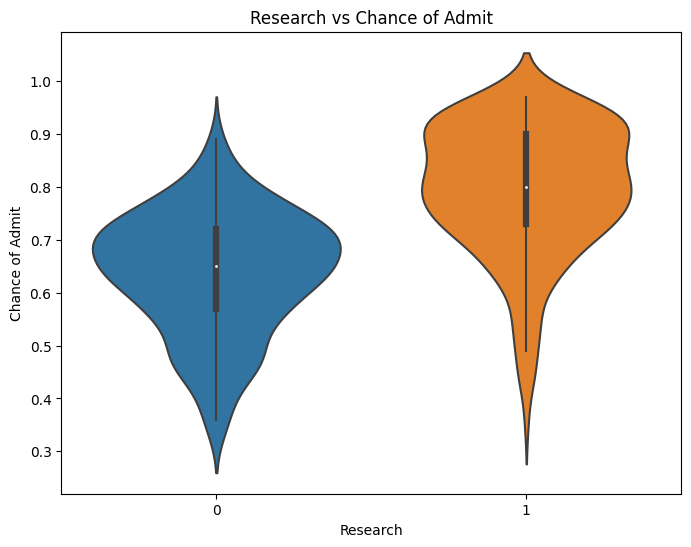

In [47]:
#Visualize "Research" vs "Chance of Admit"
plt.figure(figsize=(8,6))
sns.violinplot(x='Research', y='Chance of Admit', data=adm)
plt.title('Research vs Chance of Admit')
plt.show()

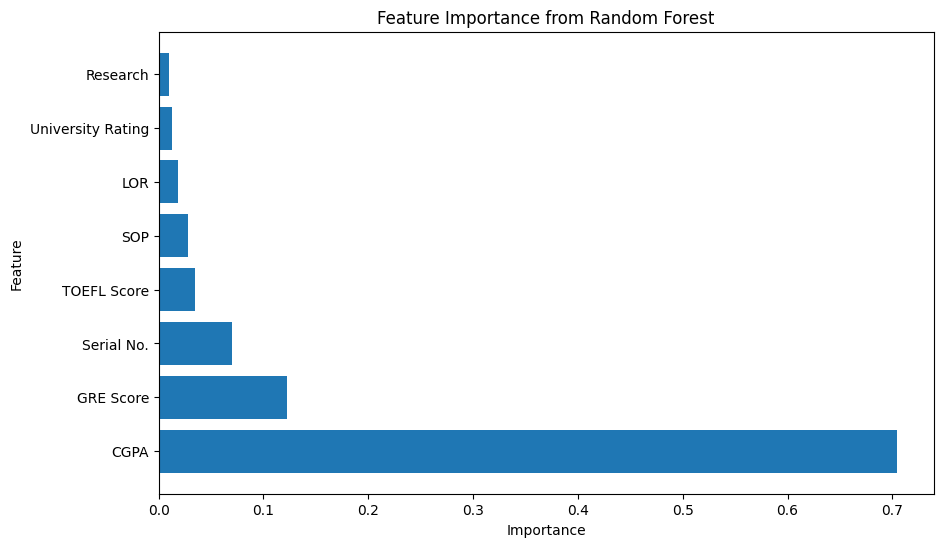

In [48]:
#Determine feature importance
#Split data
X = adm.drop('Chance of Admit', axis=1)
y = adm['Chance of Admit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importance = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance':feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

In [54]:
#Predictive Modelling
lin_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
svm = SVR()

models = {
    'Linear Regression': lin_reg,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'Support Vector Machine': svm
}

for name, model in models.items():
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    y_pred = cross_val_predict(model, X, y, cv=kfold)

    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"Model: {name}")
    print(f"RMSE: {rmse}, MAE: {mae}, r2: {r2}")
    print('-'*80)

Model: Linear Regression
RMSE: 0.06208852374548479, MAE: 0.045774850340351635, r2: 0.8099736251275688
--------------------------------------------------------------------------------
Model: Decision Tree
RMSE: 0.08465370635713478, MAE: 0.059824999999999996, r2: 0.6467491867467541
--------------------------------------------------------------------------------
Model: Random Forest
RMSE: 0.06416224960987575, MAE: 0.04568925000000003, r2: 0.7970680724730428
--------------------------------------------------------------------------------
Model: Support Vector Machine
RMSE: 0.08482331515449916, MAE: 0.06655944900096929, r2: 0.6453322501639576
--------------------------------------------------------------------------------


In [56]:
#Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

random_forest = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(random_forest, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_param = grid_search.best_params_
best_model = grid_search.best_estimator_

#Evaluate model
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameter:", best_param)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

Best Hyperparameter: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
RMSE: 0.060901344462504156
MAE: 0.0431737821861558
R2 Score: 0.8563713689036407


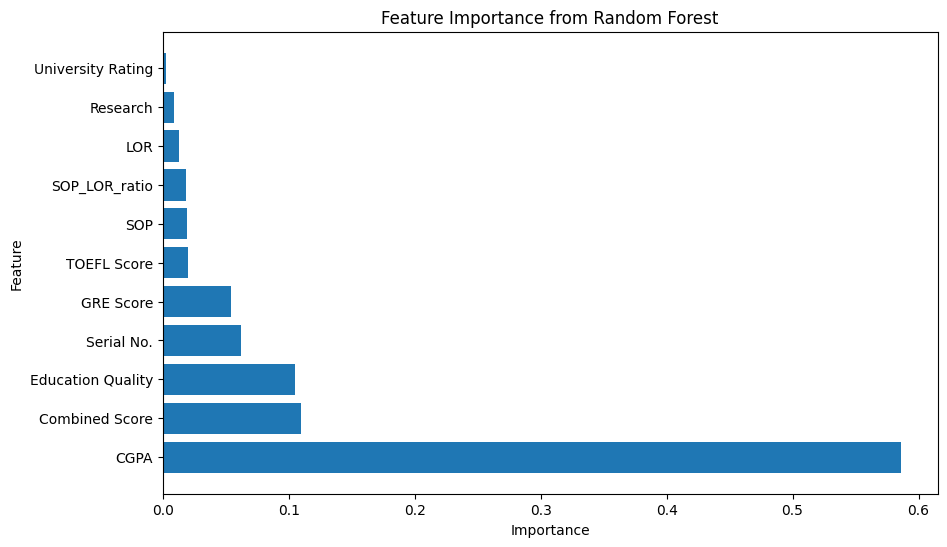

In [58]:
#Feature Engineering
adm['Combined Score'] = adm['GRE Score'] + adm['TOEFL Score']
adm['SOP_LOR_ratio'] = adm['SOP']/adm['LOR']
adm['Education Quality'] = adm['University Rating'] * adm['CGPA']

X = adm.drop('Chance of Admit', axis=1)
y = adm['Chance of Admit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importance = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance':feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()


In [59]:
#Predictive Modelling
lin_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
svm = SVR()

models = {
    'Linear Regression': lin_reg,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'Support Vector Machine': svm
}

for name, model in models.items():
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    y_pred = cross_val_predict(model, X, y, cv=kfold)

    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"Model: {name}")
    print(f"RMSE: {rmse}, MAE: {mae}, r2: {r2}")
    print('-'*80)

Model: Linear Regression
RMSE: 0.062410882134649626, MAE: 0.04620553251810871, r2: 0.8079953008916794
--------------------------------------------------------------------------------
Model: Decision Tree
RMSE: 0.0871550342780037, MAE: 0.0626, r2: 0.6255652290288984
--------------------------------------------------------------------------------
Model: Random Forest
RMSE: 0.06388634008925538, MAE: 0.04572499999999998, r2: 0.7988096094572877
--------------------------------------------------------------------------------
Model: Support Vector Machine
RMSE: 0.07576923773854082, MAE: 0.059365401652211866, r2: 0.7170061146351809
--------------------------------------------------------------------------------


In [64]:
#Stacking
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

base_model1 = RandomForestRegressor(random_state=42)
base_model2 = GradientBoostingRegressor(random_state=42)

base_model1.fit(X_train, y_train)
base_model2.fit(X_train, y_train)

meta_feature = np.column_stack((
    base_model1.predict(X_val),
    base_model2.predict(X_val)
))

meta_model = LinearRegression()
meta_model.fit(meta_feature, y_val)

base_pred1 = base_model1.predict(X_test)
base_pred2 = base_model2.predict(X_test)

ensemble_meta_feature = np.column_stack((base_pred1, base_pred2))
ensemble_pred = meta_model.predict(ensemble_meta_feature)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate performance metrics for the ensemble model
rmse_ensemble = np.sqrt(mean_squared_error(y_test, ensemble_pred))
mae_ensemble = mean_absolute_error(y_test, ensemble_pred)
r2_ensemble = r2_score(y_test, ensemble_pred)

# Calculate performance metrics for the baseline models
rmse_base1 = np.sqrt(mean_squared_error(y_test, base_pred1))
mae_base1 = mean_absolute_error(y_test, base_pred1)
r2_base1 = r2_score(y_test, base_pred1)

rmse_base2 = np.sqrt(mean_squared_error(y_test, base_pred2))
mae_base2 = mean_absolute_error(y_test, base_pred2)
r2_base2 = r2_score(y_test, base_pred2)

# Print performance metrics
print("Ensemble Model Metrics:")
print("RMSE:", rmse_ensemble)
print("MAE:", mae_ensemble)
print("R-squared:", r2_ensemble)
print("----------------------------------")
print("Baseline Model 1 Metrics:")
print("RMSE:", rmse_base1)
print("MAE:", mae_base1)
print("R-squared:", r2_base1)
print("----------------------------------")
print("Baseline Model 2 Metrics:")
print("RMSE:", rmse_base2)
print("MAE:", mae_base2)
print("R-squared:", r2_base2)



Ensemble Model Metrics:
RMSE: 0.07251503351511077
MAE: 0.05593170708675795
R-squared: 0.7963692481161686
----------------------------------
Baseline Model 1 Metrics:
RMSE: 0.070984945587075
MAE: 0.051072500000000035
R-squared: 0.8048719213163954
----------------------------------
Baseline Model 2 Metrics:
RMSE: 0.07094135049986618
MAE: 0.05309683741163744
R-squared: 0.8051115217946014
